In [2]:
import pandas as pd

# Read the Parquet file into a DataFrame
df_temp = pd.read_parquet("/Users/muhammadhussain/Desktop/Data/Revco/806016_temp.parquet")

# Display the first few rows
df_temp.head(5)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/muhammadhussain/Desktop/Data/Revco/806016_temp.parquet'

In [9]:
# Read the Parquet file into a DataFrame
df_events = pd.read_parquet("/Users/muhammadhussain/Desktop/Data/Revco/806016_events.parquet")

# Display the first few rows
df_events.head(20)

,Datetime,Type,Event,Description
0,2012-03-29 11:46:56,44,Reset to factory settings,nan
1,2012-03-29 15:36:32,63,Security Mode = Full Access,Security Mode = Full Access
2,2012-03-30 00:16:09,18,Pull Down Check Good,Pull Down Check Good
3,2012-03-30 10:34:56,46,Shutdown,nan
4,2012-03-30 16:11:06,40,Primary Setpoint = -86,Old Value = -80;New Value = -86;
5,2012-03-30 16:11:06,42,Cold Alarm = -96,Old Value = -90;New Value = -96;
6,2012-03-31 00:18:30,18,Pull Down Check Good,Pull Down Check Good
7,2012-04-02 08:56:43,46,Shutdown,nan
8,2012-07-02 13:38:00,55,Time = 13:38:00,Old Value = 13:36:26;New Value = 13:38:00;
9,2012-07-02 13:44:55,3,Door is opened,nan


In [10]:
# Read the Parquet file into a DataFrame
df_events = pd.read_parquet("/Users/muhammadhussain/Desktop/Data/Revco/806017_events.parquet")

# Display the first few rows
df_events.head(20)

,Datetime,Type,Event,Description
0,2012-02-17 08:20:04,44,Reset to factory settings,nan
1,2012-04-18 16:00:00,55,Time = 16:00:00,Old Value = 08:55:04;New Value = 16:00:00;
2,2012-04-18 16:00:06,63,Security Mode = Full Access,Security Mode = Full Access
3,2012-04-18 16:00:11,40,Primary Setpoint = -86,Old Value = -80;New Value = -86;
4,2012-04-18 16:00:11,42,Cold Alarm = -96,Old Value = -90;New Value = -96;
5,2012-04-19 08:49:23,40,Primary Setpoint = -80,Old Value = -86;New Value = -80;
6,2012-04-19 08:49:23,42,Cold Alarm = -90,Old Value = -96;New Value = -90;
7,2012-04-19 08:49:25,46,Shutdown,nan
8,2012-04-20 00:09:46,18,Pull Down Check Good,Pull Down Check Good
9,2012-04-20 08:27:42,46,Shutdown,nan


In [11]:
import pandas as pd

Rows_remove = 1000

# Load your Parquet file
df = pd.read_parquet("/Users/muhammadhussain/Desktop/Data/Revco/806016_temp.parquet")

# Identify the indices where an event has occurred
event_indices = df[df['Event'].notnull()].index

# Create sets to store indices for rows to collect and keep
indices_to_collect = set()
for idx in event_indices:
    # Add a range of indices around each event
    start_idx = max(0, idx - Rows_remove)
    end_idx = min(len(df), idx + Rows_remove)
    indices_to_collect.update(range(start_idx, end_idx + 1))

# Convert to list and sort indices (just for clarity)
indices_to_collect = sorted(indices_to_collect)

# Extract rows to collect into a separate DataFrame
df_around_events = df.iloc[indices_to_collect]

# Drop these rows from the original DataFrame to get the cleaned data
df_cleaned = df.drop(indices_to_collect)

# Save both DataFrames
df_around_events.to_parquet('around_events_data.parquet', index=False)
df_cleaned.to_parquet('cleaned_data.parquet', index=False)

In [12]:
# Read the Parquet file into a DataFrame
df_temp = pd.read_parquet('cleaned_data.parquet')

pd.set_option('display.max_rows', None)

# Display the first few rows
df_temp.head(100)

,Datetime,RTD,1st Suc.,Cond. Air In,Evap. In,Evap. Out,2nd Suc.,Chil. water In,2nd Sump,H.E.,SetPoint,Mains Voltage,State,Type,Event
0,2012-03-31 17:58:26,-84.8,-34.6,20.5,-85.0,-89.7,-28.0,19.5,41.2,-38.0,-86,223.0,3,None,None
1,2012-03-31 17:59:26,-84.8,-30.2,20.4,-85.0,-89.6,-28.6,19.5,41.3,-38.0,-86,222.0,3,None,None
2,2012-03-31 18:00:26,-84.8,-29.0,20.4,-85.0,-90.0,-29.0,19.6,41.5,-38.1,-86,221.0,3,None,None
3,2012-03-31 18:01:26,-84.8,-32.9,20.4,-85.0,-90.0,-29.5,19.6,41.6,-38.9,-86,221.0,3,None,None
4,2012-03-31 18:02:26,-84.8,-32.5,20.5,-85.0,-90.0,-30.0,19.5,41.6,-38.0,-86,222.0,3,None,None
5,2012-03-31 18:03:26,-85.0,-30.0,20.4,-85.0,-90.0,-30.0,19.5,41.8,-38.0,-86,221.0,3,None,None
6,2012-03-31 18:04:26,-85.0,-29.4,20.5,-85.0,-90.0,-30.7,19.5,41.8,-38.6,-86,222.0,3,None,None
7,2012-03-31 18:05:26,-85.0,-32.7,20.5,-85.4,-90.0,-31.0,19.6,41.9,-39.0,-86,223.0,3,None,None
8,2012-03-31 18:06:27,-85.0,-31.6,20.4,-85.9,-90.0,-31.0,19.4,42.2,-38.0,-86,223.0,3,None,None
9,2012-03-31 18:07:26,-85.0,-30.0,20.4,-85.8,-90.0,-31.9,19.5,42.4,-38.0,-86,223.0,3,None,None


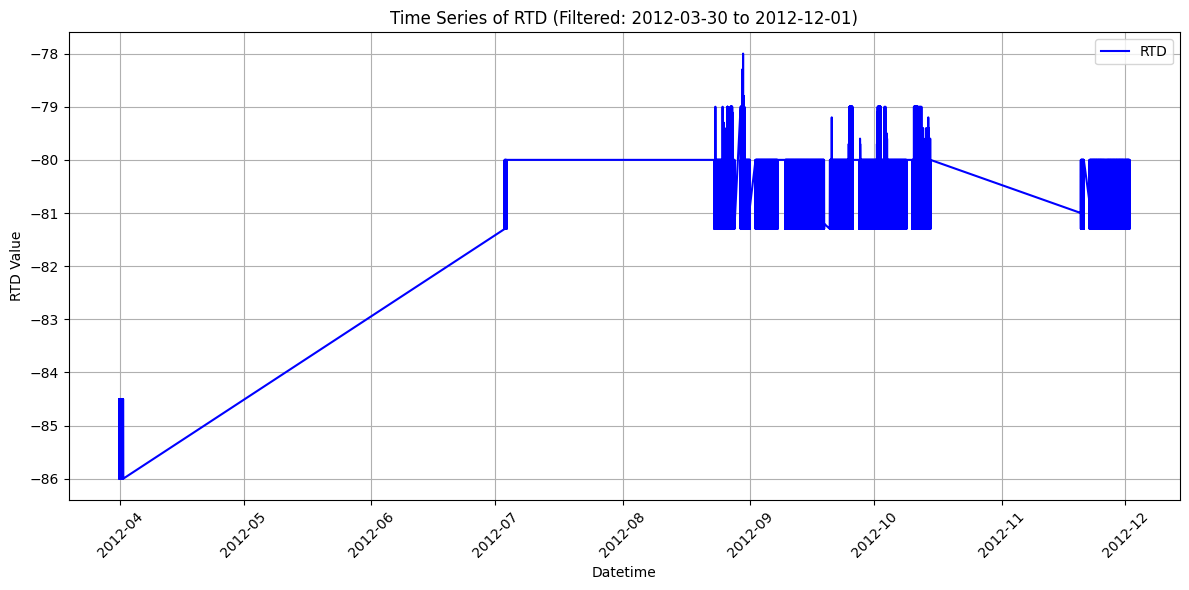

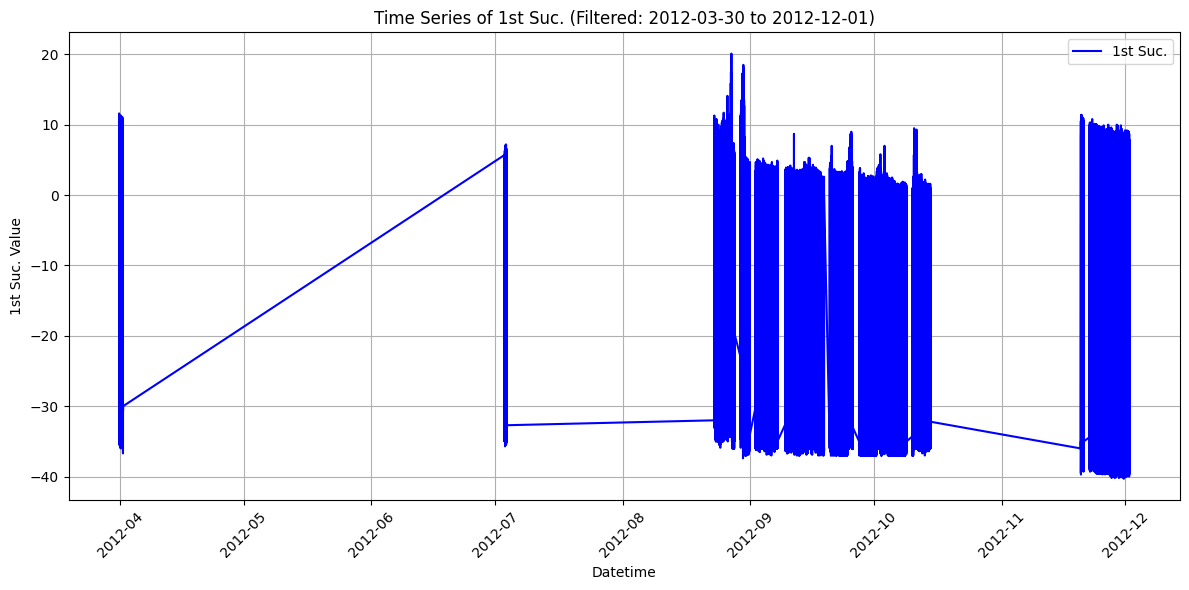

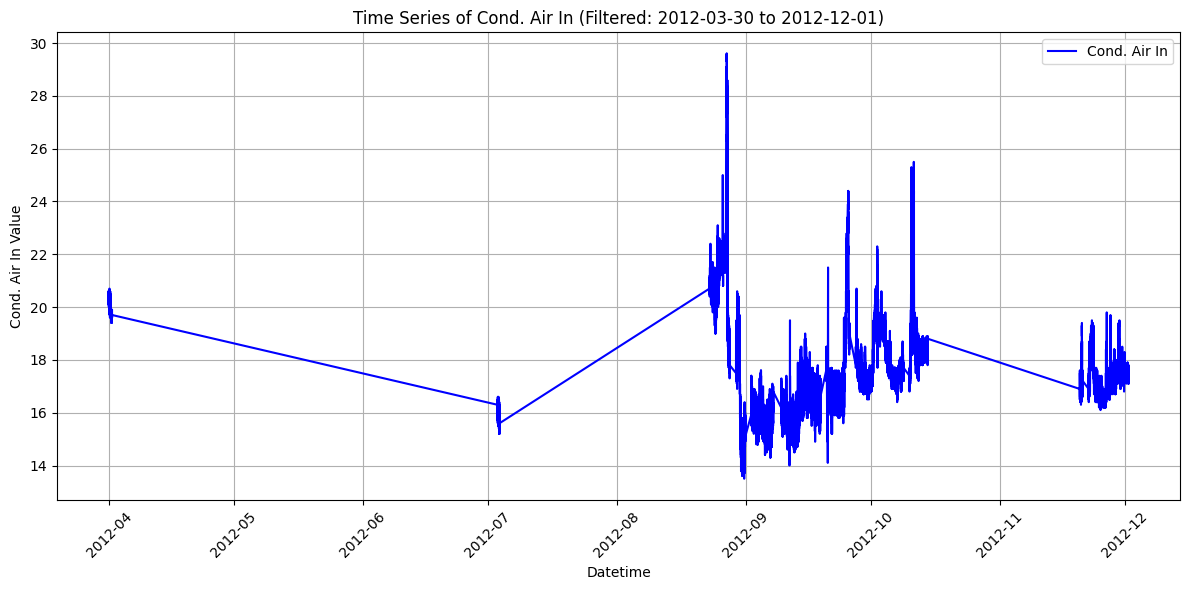

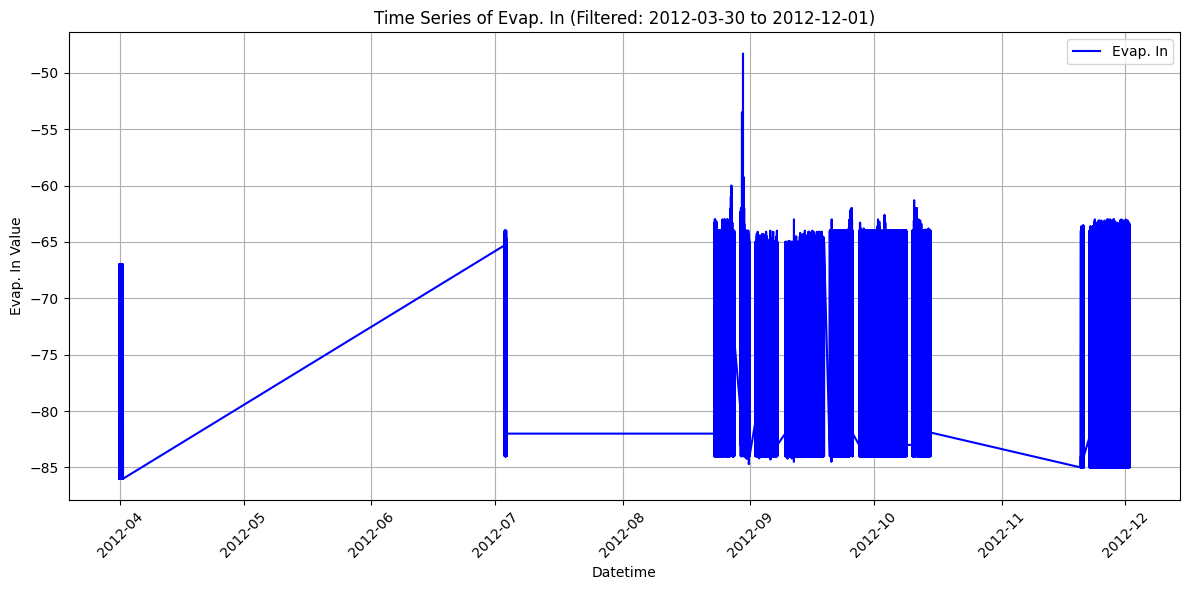

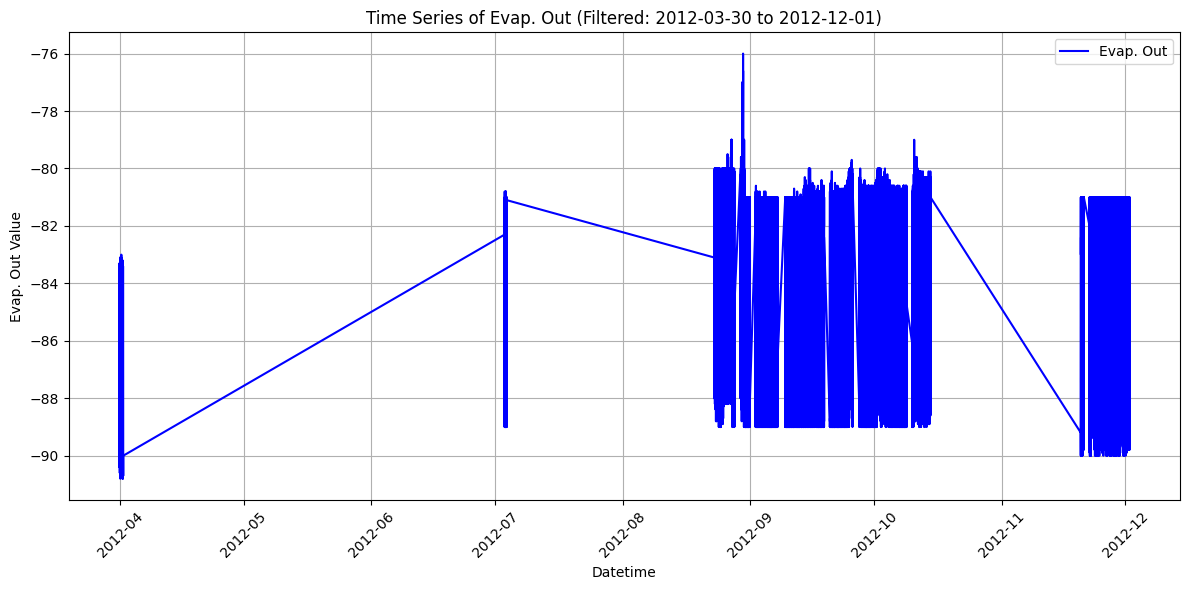

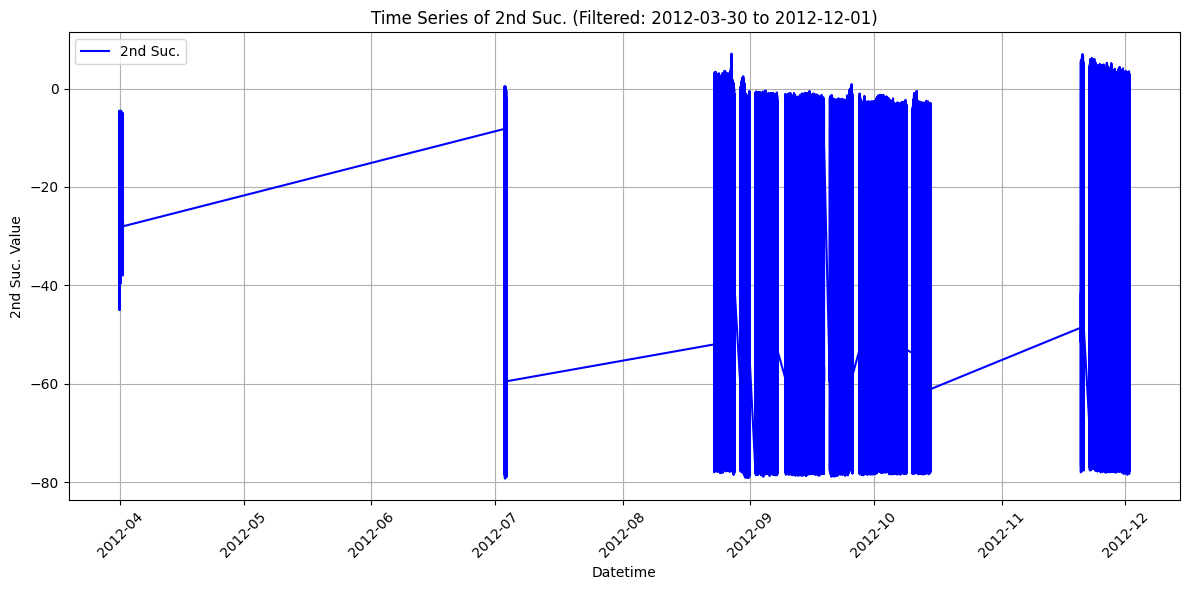

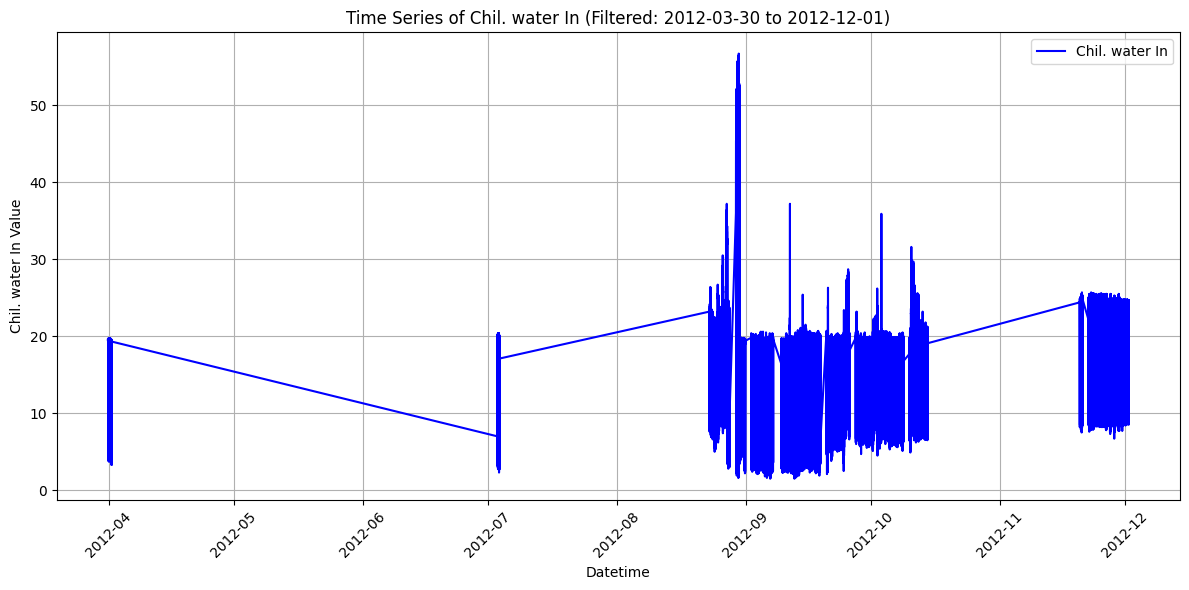

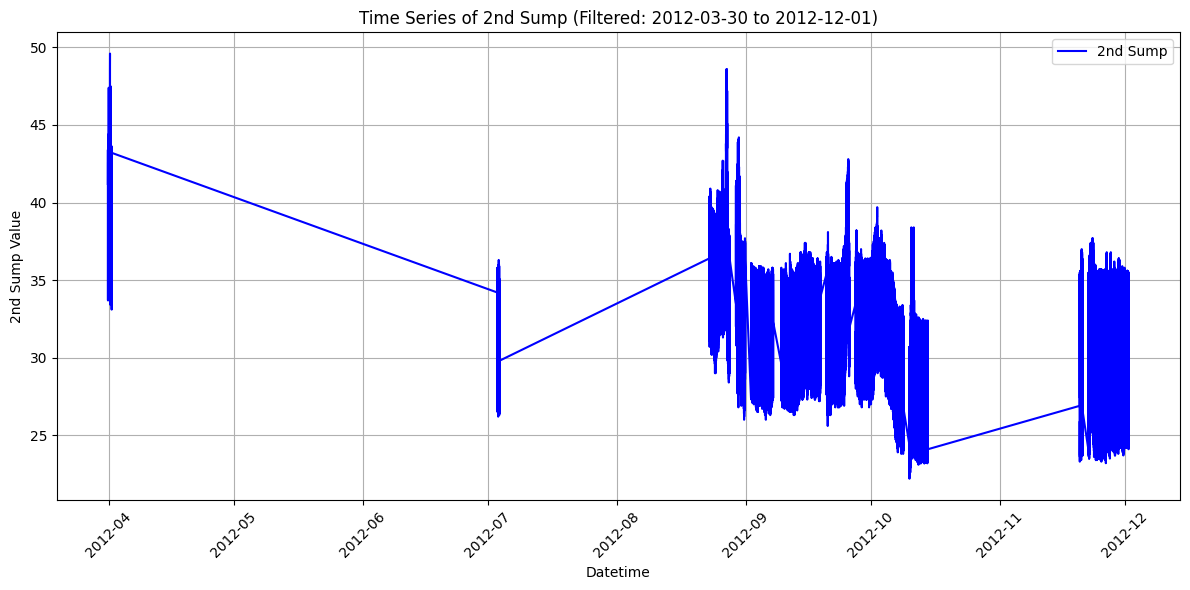

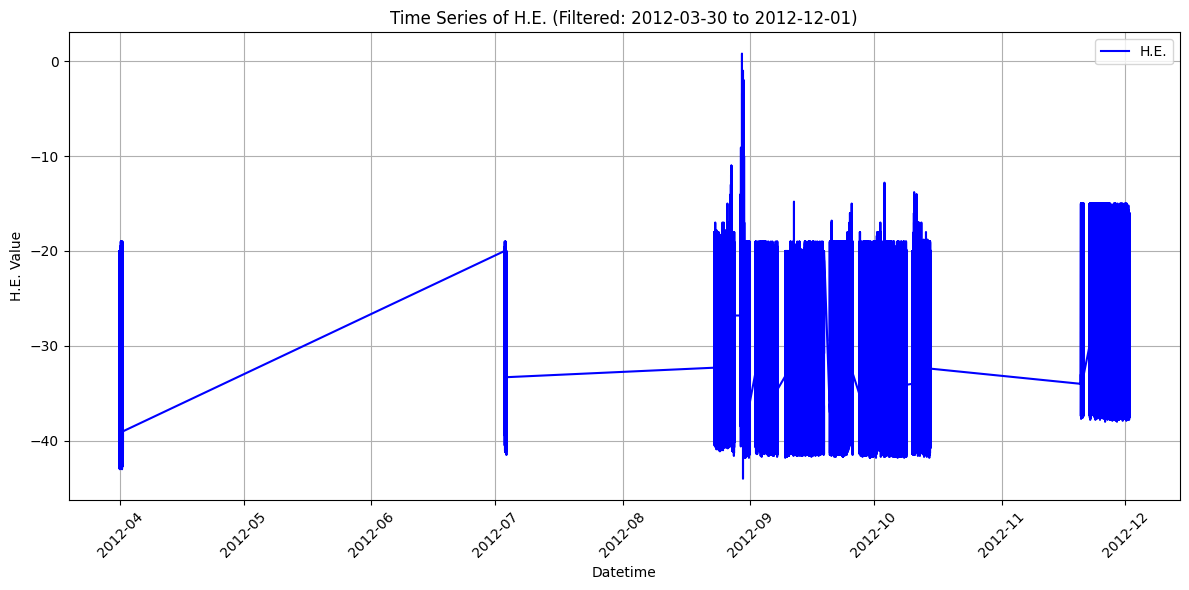

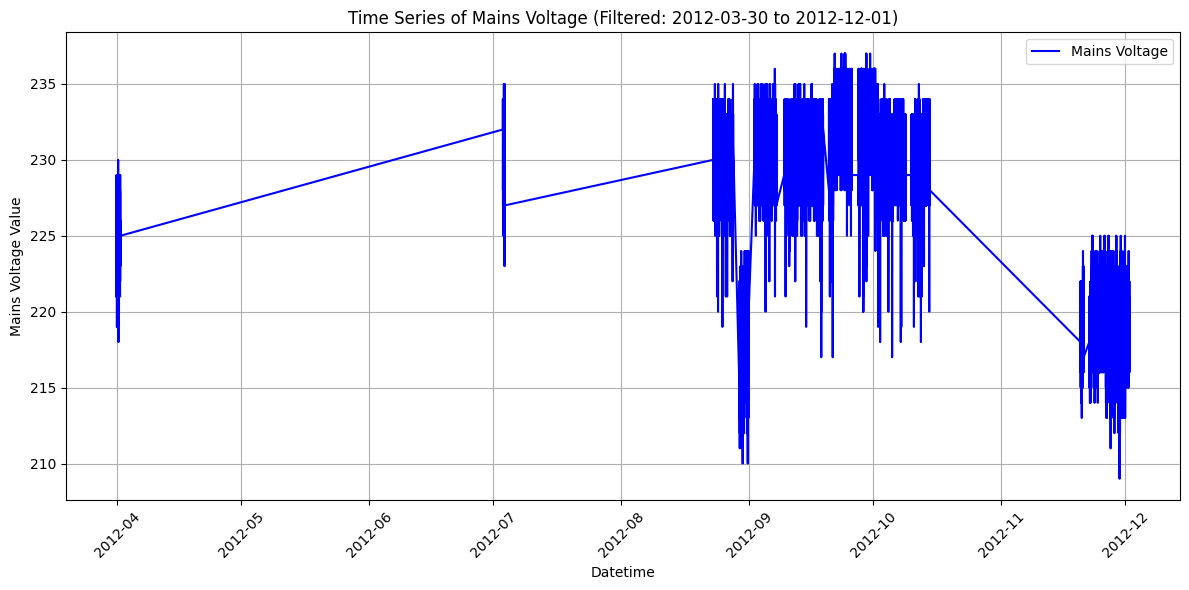

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
Rows_remove = 1000
start_date = '2012-03-30'
end_date = '2012-12-01'

# Read the cleaned Parquet file into a DataFrame
df = pd.read_parquet('cleaned_data.parquet')

# Convert 'Datetime' to datetime type if it's not already
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Set 'Datetime' as the index for easier plotting
df.set_index('Datetime', inplace=True)

# Filter the DataFrame to the specified date range
df_filtered = df.loc[start_date:end_date]

# Select only numeric columns for plotting
numeric_columns = df_filtered.select_dtypes(include=['float64', 'int64']).columns

# Plot each numeric column separately
for col in numeric_columns:
    plt.figure(figsize=(12, 6))
    plt.plot(df_filtered.index, df_filtered[col], label=col, color='blue')

    # Highlight gaps caused by the removal of rows around events
    removed_indices = np.where(df_filtered[col].isnull())[0]
    if len(removed_indices) > 0:
        for idx in removed_indices:
            plt.axvline(df_filtered.index[idx], color='red', linestyle='--', alpha=0.5)

    plt.title(f"Time Series of {col} (Filtered: {start_date} to {end_date})")
    plt.xlabel("Datetime")
    plt.ylabel(f"{col} Value")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.legend()
    plt.show()

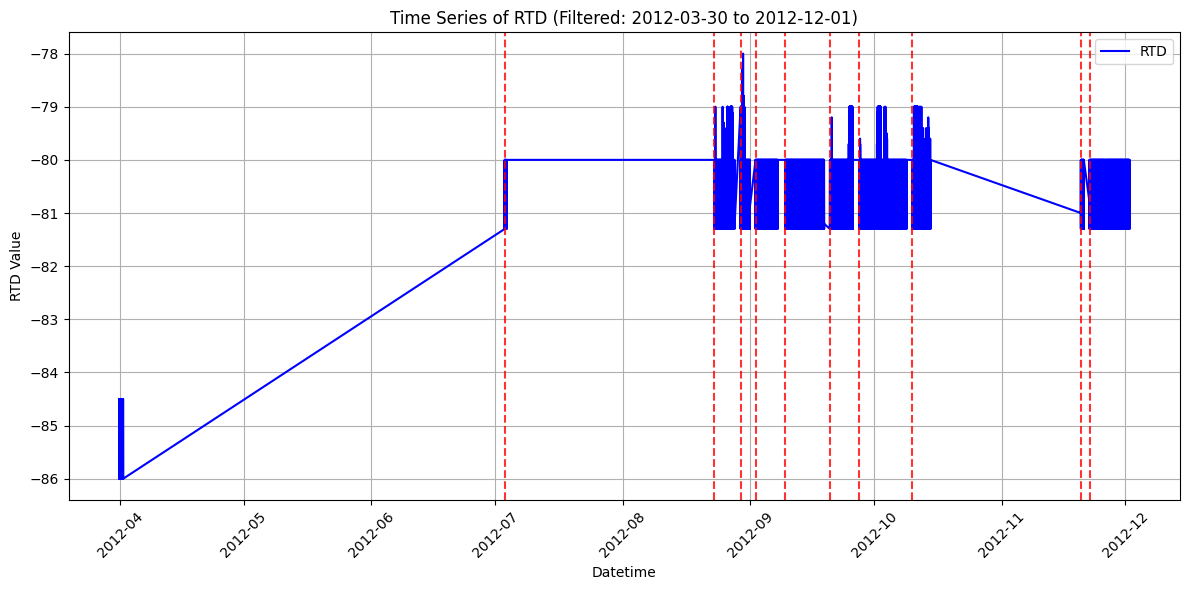

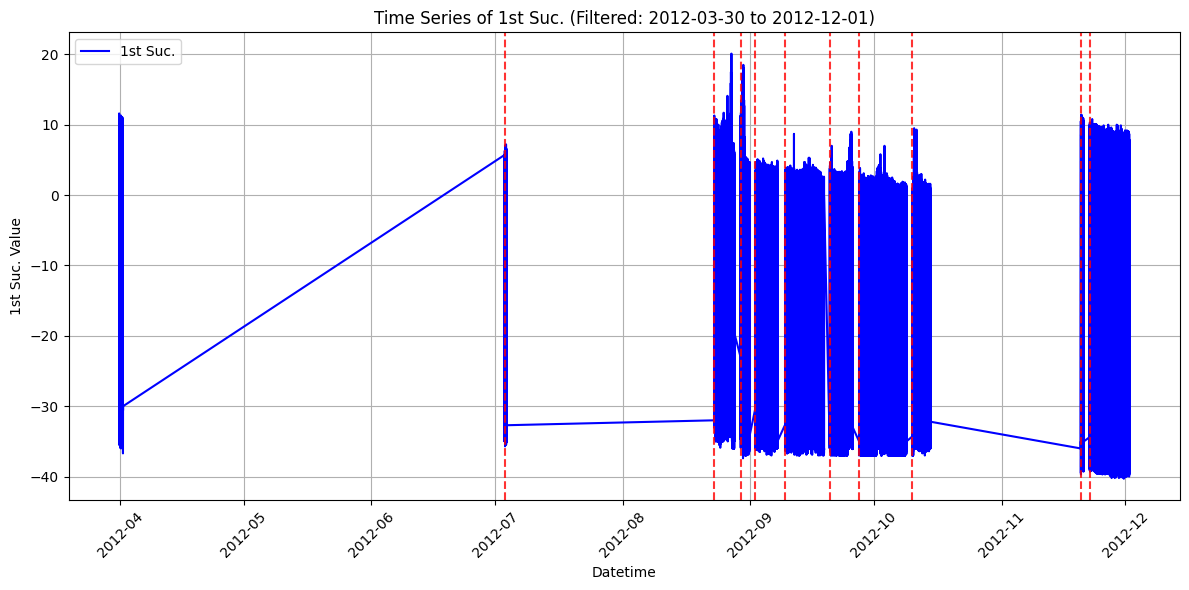

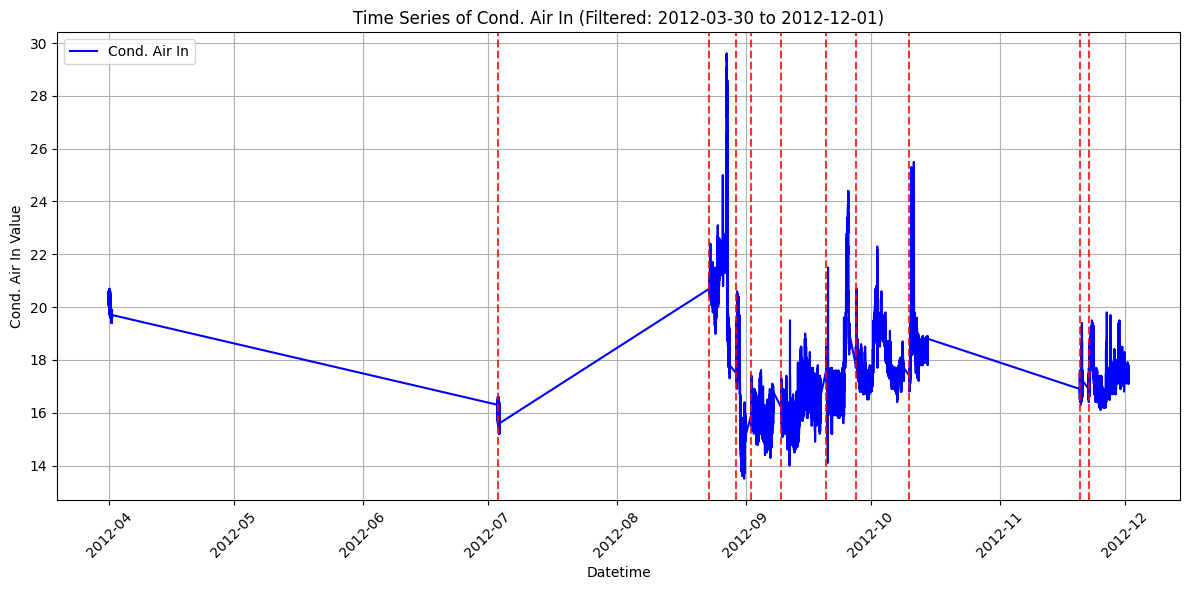

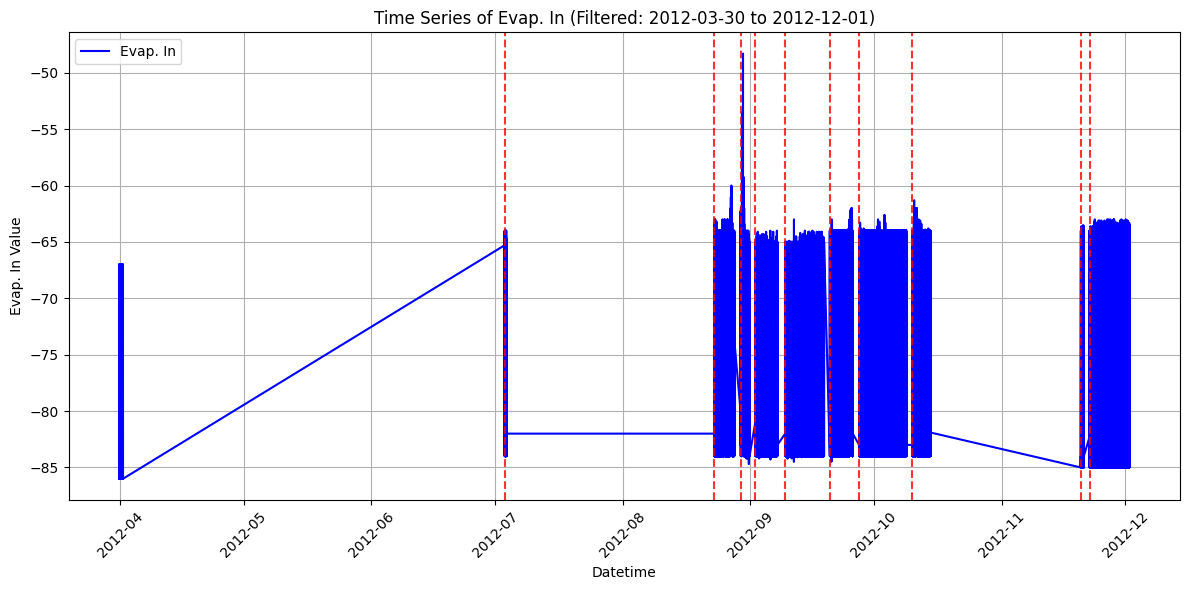

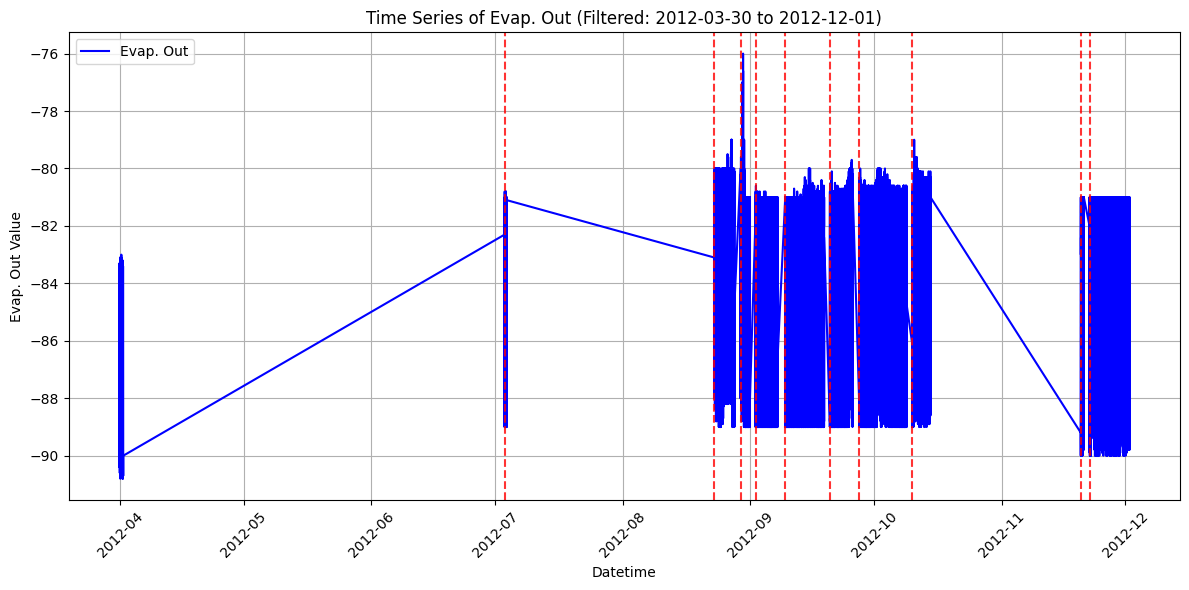

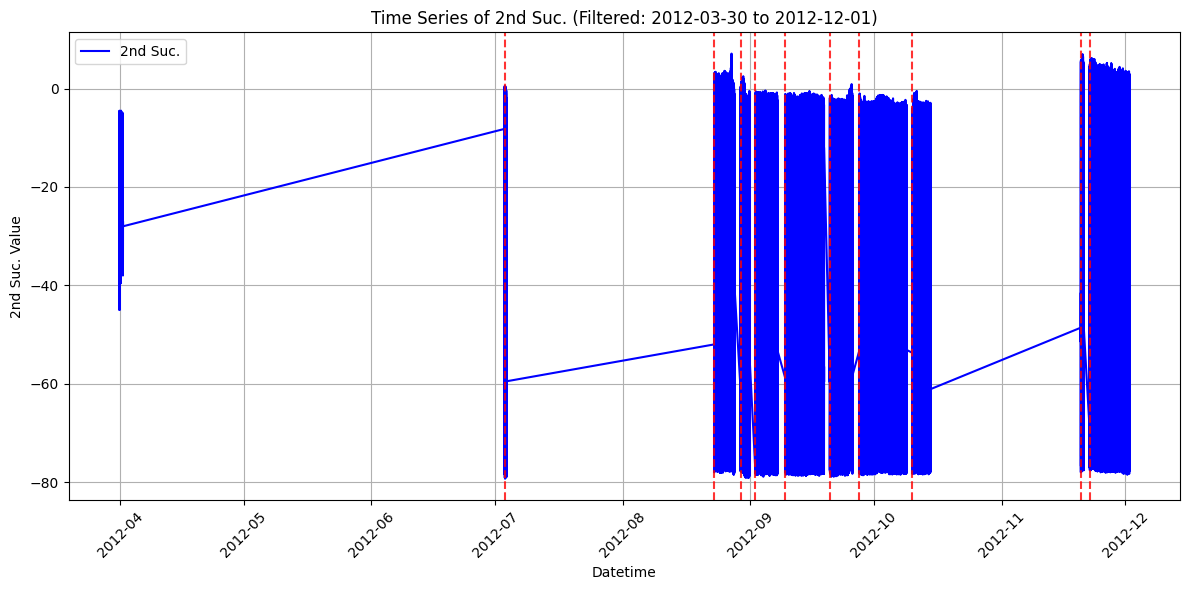

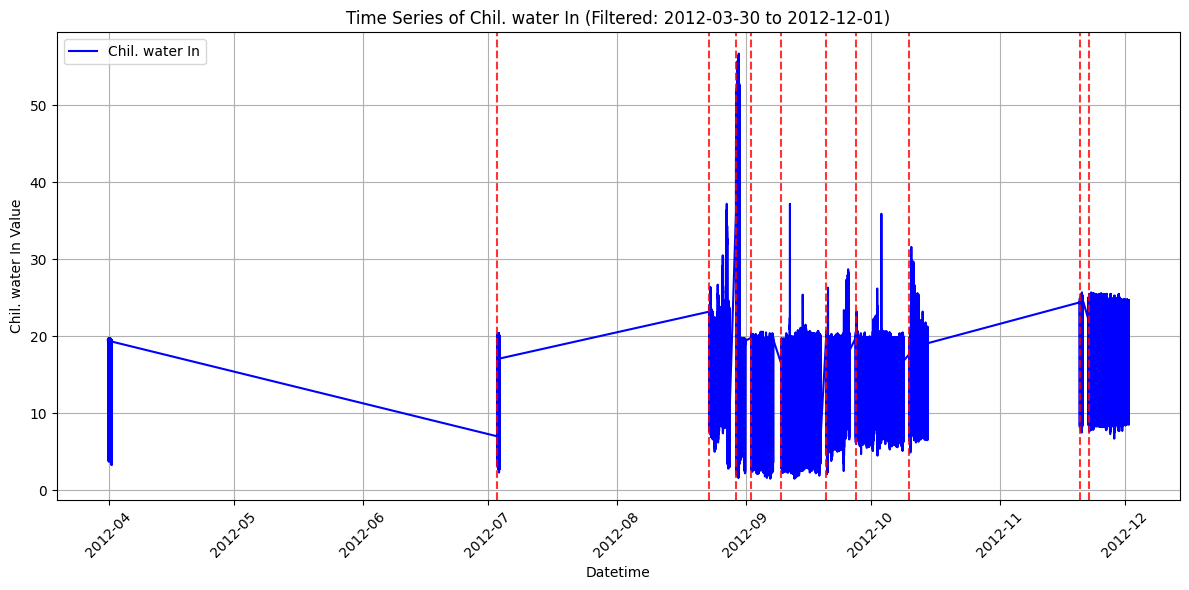

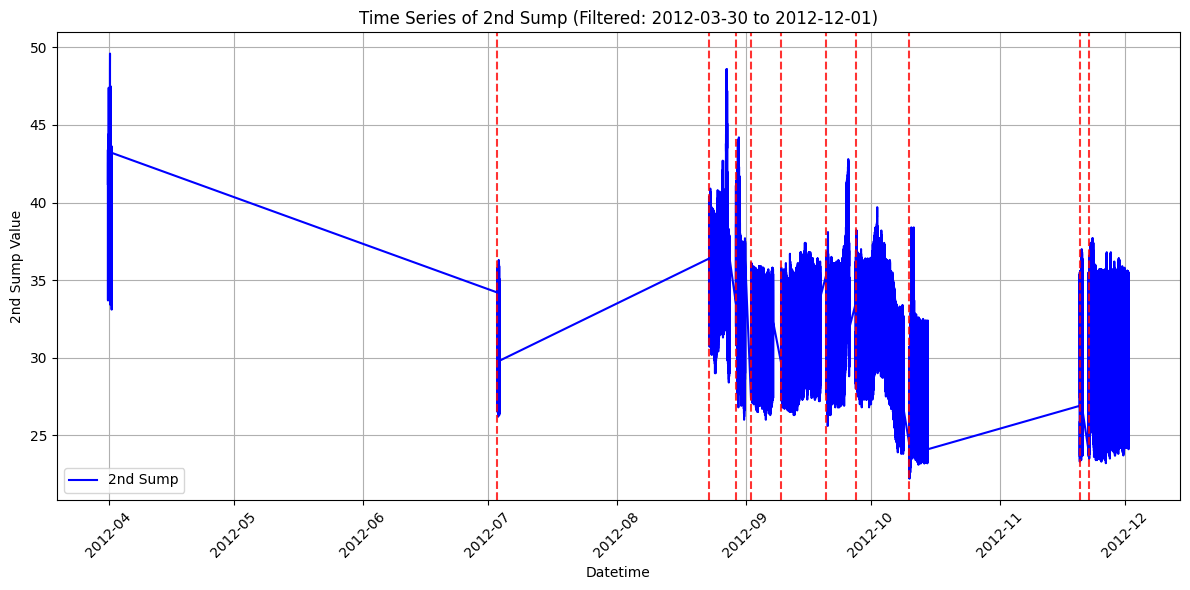

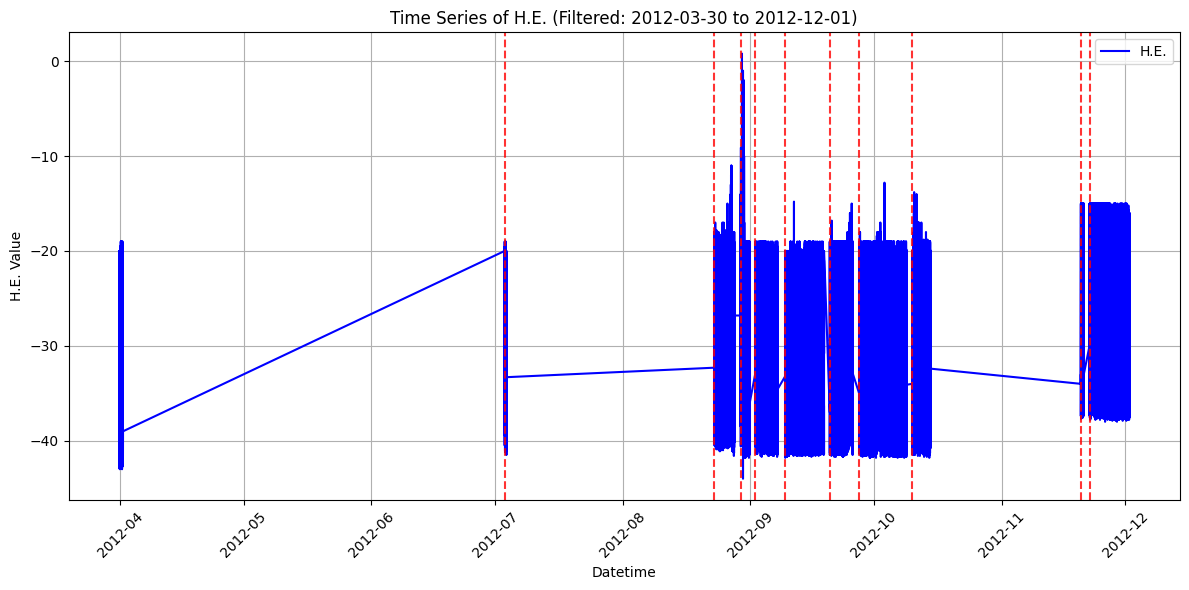

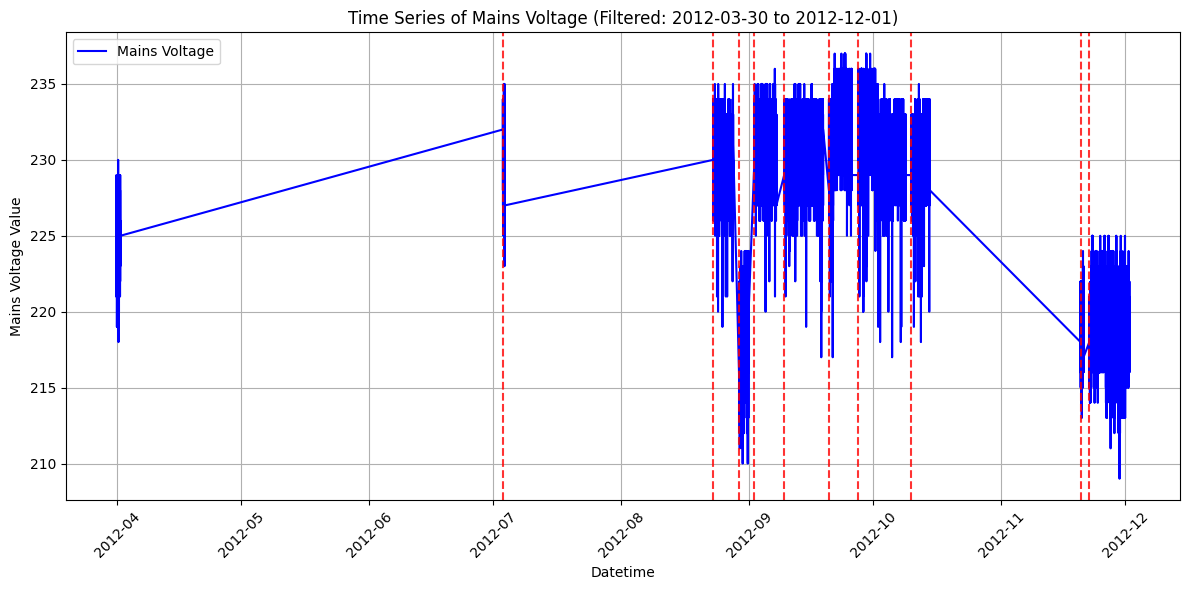

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parameters
Rows_remove = 1000
start_date = '2012-03-30'
end_date = '2012-12-01'

# Read the cleaned Parquet file into a DataFrame
df = pd.read_parquet('cleaned_data.parquet')

# Convert 'Datetime' to datetime type if it's not already
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Set 'Datetime' as the index for easier plotting
df.set_index('Datetime', inplace=True)

# Filter the DataFrame to the specified date range
df_filtered = df.loc[start_date:end_date]

# Select only numeric columns for plotting
numeric_columns = df_filtered.select_dtypes(include=['float64', 'int64']).columns

# Calculate time differences between consecutive rows
time_diffs = df_filtered.index.to_series().diff().dt.total_seconds()

# Define a threshold (e.g., 2x the median difference) to detect large gaps
gap_threshold = 2 * time_diffs.median()
gap_indices = time_diffs[time_diffs > gap_threshold].index

# Plot each numeric column separately
for col in numeric_columns:
    plt.figure(figsize=(12, 6))
    plt.plot(df_filtered.index, df_filtered[col], label=col, color='blue')

    # Highlight gaps in the data where rows were removed
    for gap in gap_indices:
        plt.axvline(gap, color='red', linestyle='--', alpha=0.8)

    plt.title(f"Time Series of {col} (Filtered: {start_date} to {end_date})")
    plt.xlabel("Datetime")
    plt.ylabel(f"{col} Value")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.legend()
    plt.show()